In [1]:
import pandas as pd
import numpy as np

# Dataset 1

In [6]:
data_math = pd.read_csv("Data/student-mat.csv", sep = ";")

In [8]:
data_math.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [10]:
data_math.isnull().sum()
# No need to filter null 

age           0
Medu          0
Fedu          0
traveltime    0
studytime     0
failures      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [9]:
# lazy feature selection
for feat in data_math.columns:
    if type(data_math[feat][0]) == str:
        data_math= data_math.drop(feat, axis = 1)

In [4]:
data_math.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [6]:
feats = data_math.drop(['G3'], axis = 1)
labels = data_math['G3']

In [7]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_validate

In [8]:
model = KNeighborsRegressor(n_neighbors=2)

cv_results = cross_validate(model, feats, labels, cv=5)

In [9]:
cv_results

{'fit_time': array([0.00295544, 0.00299096, 0.00195932, 0.00197387, 0.00299215]),
 'score_time': array([0.0019958 , 0.00199437, 0.00201559, 0.00199461, 0.00199366]),
 'test_score': array([0.73040172, 0.84053898, 0.75276141, 0.82792464, 0.7627562 ])}

# Dataset 2

In [11]:
from scipy.io.arff import loadarff

In [12]:
data_arff = loadarff('Data/Sapfile1.arff')
data_2 = pd.DataFrame(data_arff[0])

In [13]:
data_2.head()

,ge,cst,tnp,twp,iap,esp,arr,ms,ls,as,...,fq,mq,fo,mo,nf,sh,ss,me,tt,atd
0,b'F',b'G',b'Good',b'Good',b'Vg',b'Good',b'Y',b'Unmarried',b'V',b'Paid',...,b'Um',b'10',b'Farmer',b'Housewife',b'Large',b'Poor',b'Govt',b'Asm',b'Small',b'Good'
1,b'M',b'OBC',b'Vg',b'Vg',b'Vg',b'Vg',b'N',b'Unmarried',b'V',b'Paid',...,b'Um',b'Il',b'Service',b'Service',b'Small',b'Poor',b'Govt',b'Asm',b'Average',b'Average'
2,b'F',b'OBC',b'Good',b'Good',b'Vg',b'Good',b'N',b'Unmarried',b'V',b'Paid',...,b'12',b'10',b'Service',b'Housewife',b'Average',b'Average',b'Govt',b'Asm',b'Large',b'Good'
3,b'M',b'MOBC',b'Pass',b'Good',b'Vg',b'Good',b'N',b'Unmarried',b'V',b'Paid',...,b'12',b'Um',b'Business',b'Business',b'Large',b'Poor',b'Govt',b'Asm',b'Average',b'Average'
4,b'M',b'G',b'Good',b'Good',b'Vg',b'Vg',b'N',b'Unmarried',b'V',b'Paid',...,b'10',b'12',b'Service',b'Housewife',b'Large',b'Poor',b'Private',b'Asm',b'Small',b'Good'


In [14]:
data_2.isnull().sum()
# No need to filter null.

ge     0
cst    0
tnp    0
twp    0
iap    0
esp    0
arr    0
ms     0
ls     0
as     0
fmi    0
fs     0
fq     0
mq     0
fo     0
mo     0
nf     0
sh     0
ss     0
me     0
tt     0
atd    0
dtype: int64

# Dataset 3

In [186]:
import numpy as np

In [187]:
import matplotlib.pyplot as plt

In [188]:
data_exam = pd.read_csv("Data/StudentsPerformance.csv")

In [189]:
data_exam.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [190]:
data_exam.isnull().sum()
# No need to filter null

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [191]:
data_exam = pd.concat([data_exam, pd.get_dummies(data_exam['gender'], prefix = 'Gender')], axis = 1)
data_exam = data_exam.drop(['gender','Gender_male'], axis = 1)
data_exam = pd.concat([data_exam, pd.get_dummies(data_exam['parental level of education'], prefix = 'education')], axis = 1)
data_exam = data_exam.drop(['parental level of education'], axis = 1)
data_exam = pd.concat([data_exam, pd.get_dummies(data_exam['race/ethnicity'], prefix = 'race')], axis = 1)
data_exam = data_exam.drop(['race/ethnicity'], axis = 1)
data_exam = pd.concat([data_exam, pd.get_dummies(data_exam['lunch'], prefix = 'lunch')], axis = 1)
data_exam = data_exam.drop(['lunch'], axis = 1)
data_exam = pd.concat([data_exam, pd.get_dummies(data_exam['test preparation course'], prefix = 'prepare')], axis = 1)
data_exam = data_exam.drop(['test preparation course','lunch_standard', 'prepare_none'], axis = 1)
Score = []
grade = []
for i in range(len(data_exam)):
    Score.append(int((data_exam['math score'][i] + data_exam['reading score'][i] + data_exam['writing score'][i])/300*1000)/1000*100)
data_exam['Score'] = Score
data_exam = data_exam.drop(['math score', 'reading score', 'writing score'], axis = 1)
for i in range(len(data_exam)):
    if Score[i] >= 90:
        grade.append('A')
    elif 80 <= Score[i] < 90:
        grade.append('B')
    elif 70 <= Score[i] < 80:
        grade.append('C')
    else:
        grade.append('D')
data_exam['Grade'] = grade

In [194]:
data_exam.head()

,Gender_female,education_associate's degree,education_bachelor's degree,education_high school,education_master's degree,education_some college,education_some high school,race_group A,race_group B,race_group C,race_group D,race_group E,lunch_free/reduced,prepare_completed,Score,Grade
0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,72.6,C
1,1,0,0,0,0,1,0,0,0,1,0,0,0,1,82.3,B
2,1,0,0,0,1,0,0,0,1,0,0,0,0,0,92.6,A
3,0,1,0,0,0,0,0,1,0,0,0,0,1,0,49.3,D
4,0,0,0,0,0,1,0,0,0,1,0,0,0,0,76.3,C


In [198]:
# Split data
x = data_exam.iloc[:, 0:14]
x.head()

,Gender_female,education_associate's degree,education_bachelor's degree,education_high school,education_master's degree,education_some college,education_some high school,race_group A,race_group B,race_group C,race_group D,race_group E,lunch_free/reduced,prepare_completed
0,1,0,1,0,0,0,0,0,1,0,0,0,0,0
1,1,0,0,0,0,1,0,0,0,1,0,0,0,1
2,1,0,0,0,1,0,0,0,1,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0,0,0,1,0
4,0,0,0,0,0,1,0,0,0,1,0,0,0,0


In [200]:
y = data_exam.iloc[:, 15]
y.head()

0    C
1    B
2    A
3    D
4    C
Name: Grade, dtype: object

In [203]:
from sklearn import preprocessing


In [207]:
le = preprocessing.LabelEncoder()
le.fit(y)
y = le.transform(y)

Grade = le.classes_
Grade[1]

1

In [223]:
# package needed
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [224]:
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size = 0.25, random_state = 10)

In [225]:
# check train & test has the same length
x_train.shape

(750, 14)

In [226]:
y_train.shape

(750,)

In [227]:
accuracy_rate = []
k_range = list(range(1, 30))
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(x_train, y_train)
    kprediction = knn.predict(x_test)
    accuracy_rate.append(metrics.accuracy_score(kprediction, y_test))
    

Text(0, 0.5, 'Accuracy rate')

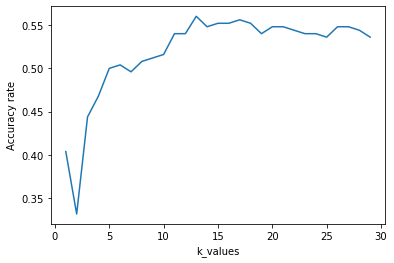

In [232]:
plt.plot(k_range, accuracy_rate)
plt.xlabel('k_value')
plt.ylabel('Accuracy rate')

In [238]:
from sklearn.linear_model import LogisticRegression
lreg = LogisticRegression()

In [239]:
lreg.fit(x_train,y_train)

LogisticRegression()

In [246]:
lrpred = lreg.predict(x_test)
Logistic_regression_result = metrics.accuracy_score(lrpred, y_test)
print (Logistic_regression_result)

0.54


In [247]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

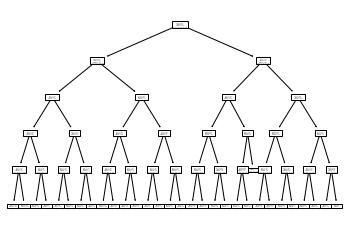

In [274]:
dt_result = []
tree_depth = list(range(1, 6))
for depth in tree_depth:
    dt = DecisionTreeClassifier(random_state = 0, max_depth = depth)
    dt.fit(x_train,y_train)
    dtprediction = dt.predict(x_test)
    DT_result = metrics.accuracy_score(dtprediction,y_test)
    dt_result.append(DT_result)
    tree.plot_tree(dt) # Tree when depth is 6

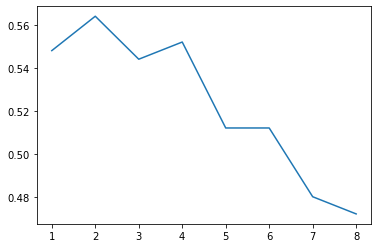

In [270]:
plt.plot(tree_depth, dt_result)


In [276]:
from sklearn.svm import SVR

In [294]:
svr_kernel = SVR(kernel = 'rbf', C = 1e3, gamma=0.1)
svr_linear = SVR(kernel = 'linear', C = 1e3)
svr_poly = SVR(kernel = 'poly', C = 1e3, degree=2)

In [296]:
svr_kernel.fit(x_train, y_train)
svr_linear.fit(x_train,y_train)
svr_poly.fit(x_train,y_train)
svrpred1 = svr_kernel.predict(x_test)
svrpred2 = svr_linear.predict(x_test)
svrpred3 = svr_poly.predict(x_test)
# print (svrpred)
kernel = metrics.mean_squared_error(svrpred1, y_test)
linear = metrics.mean_squared_error(svrpred2, y_test)
poly = metrics.mean_squared_error(svrpred3, y_test)
print ('SVR_kernel: ', kernel, 'SVR_linear: ', linear, 'SVR_poly: ', poly) 

SVR_kernel:  1.1234349366479925 SVR_linear:  0.7470874374805373 SVR_poly:  0.8710069629602218
